# Figure 01

In [1]:
function imshow () {
    IM=$1
    shift
	cfl2png "$@" $IM $IM.png
	cat $IM.png | display
	rm $IM.png
}

In [2]:
bart version

v0.4.04


In [3]:
cd 01_02_03_smallfov/brain

# generate undersampled data
bart fmac data/alias data/pat data/unders

In [9]:
# perform ENLIVE reconstructions with 1 map, 2 maps, and with 2 maps and uncombined
# In binder, this reconstruction takes a long time (about 30 min for me)
# On an office computer, it takes less than 15 seconds

mkdir -p reco_ENLIVE

bart nlinv -S -a240 -b40 -i19 -R1.5 -d0 -m1 data/unders reco_ENLIVE/r_mm_1
bart nlinv -S -a240 -b40 -i19 -R1.5 -d0 -m2 data/unders reco_ENLIVE/r_mm_2
bart nlinv -S -a240 -b40 -i19 -R1.5 -d0 -m2 -U data/unders reco_ENLIVE/r_mmu_2

bart join 2 reco_ENLIVE/r_mm_{1,2,j12}

bart slice 4 0 reco_ENLIVE/r_mmu_2{,_0}
bart slice 4 1 reco_ENLIVE/r_mmu_2{,_1}

bart join 2 reco_ENLIVE/r_mmu_2_{0,1,j01}

bart join 1 reco_ENLIVE/r_mm_j12 reco_ENLIVE/r_mmu_2_j01 reco_ENLIVE/r_j

In [10]:
# ESPIRiT followed by parallel imaging reconstruction

mkdir -p reco_ESPIRiT

bart ecalib -m1 data/unders reco_ESPIRiT/sens_m1
bart pics -S -r0.001 data/unders reco_ESPIRiT/sens_m1 reco_ESPIRiT/r_mm_1

bart ecalib -m2 data/unders reco_ESPIRiT/sens_m2
bart pics -S -r0.001 data/unders reco_ESPIRiT/sens_m2 reco_ESPIRiT/r_mmu_2
bart rss 16 reco_ESPIRiT/r_mmu_2 reco_ESPIRiT/r_mm_2

bart join 2 reco_ESPIRiT/r_mm_{1,2,j12}

bart slice 4 0 reco_ESPIRiT/r_mmu_2{,_0}
bart slice 4 1 reco_ESPIRiT/r_mmu_2{,_1}

bart join 2 reco_ESPIRiT/r_mmu_2_{0,1,j01}

bart join 1 reco_ESPIRiT/r_mm_j12 reco_ESPIRiT/r_mmu_2_j01 reco_ESPIRiT/r_j

#imshow reco_ESPIRiT/r_j -x2 -y1 -u0.5


Done.
Size: 81920 Samples: 27167 Acc: 3.02
l2 regularization: 0.001000
conjugate gradients
Total Time: 6.739158
Done.
2 maps.
ESPIRiT reconstruction.
Size: 81920 Samples: 27167 Acc: 3.02
l2 regularization: 0.001000
conjugate gradients
Total Time: 12.344184


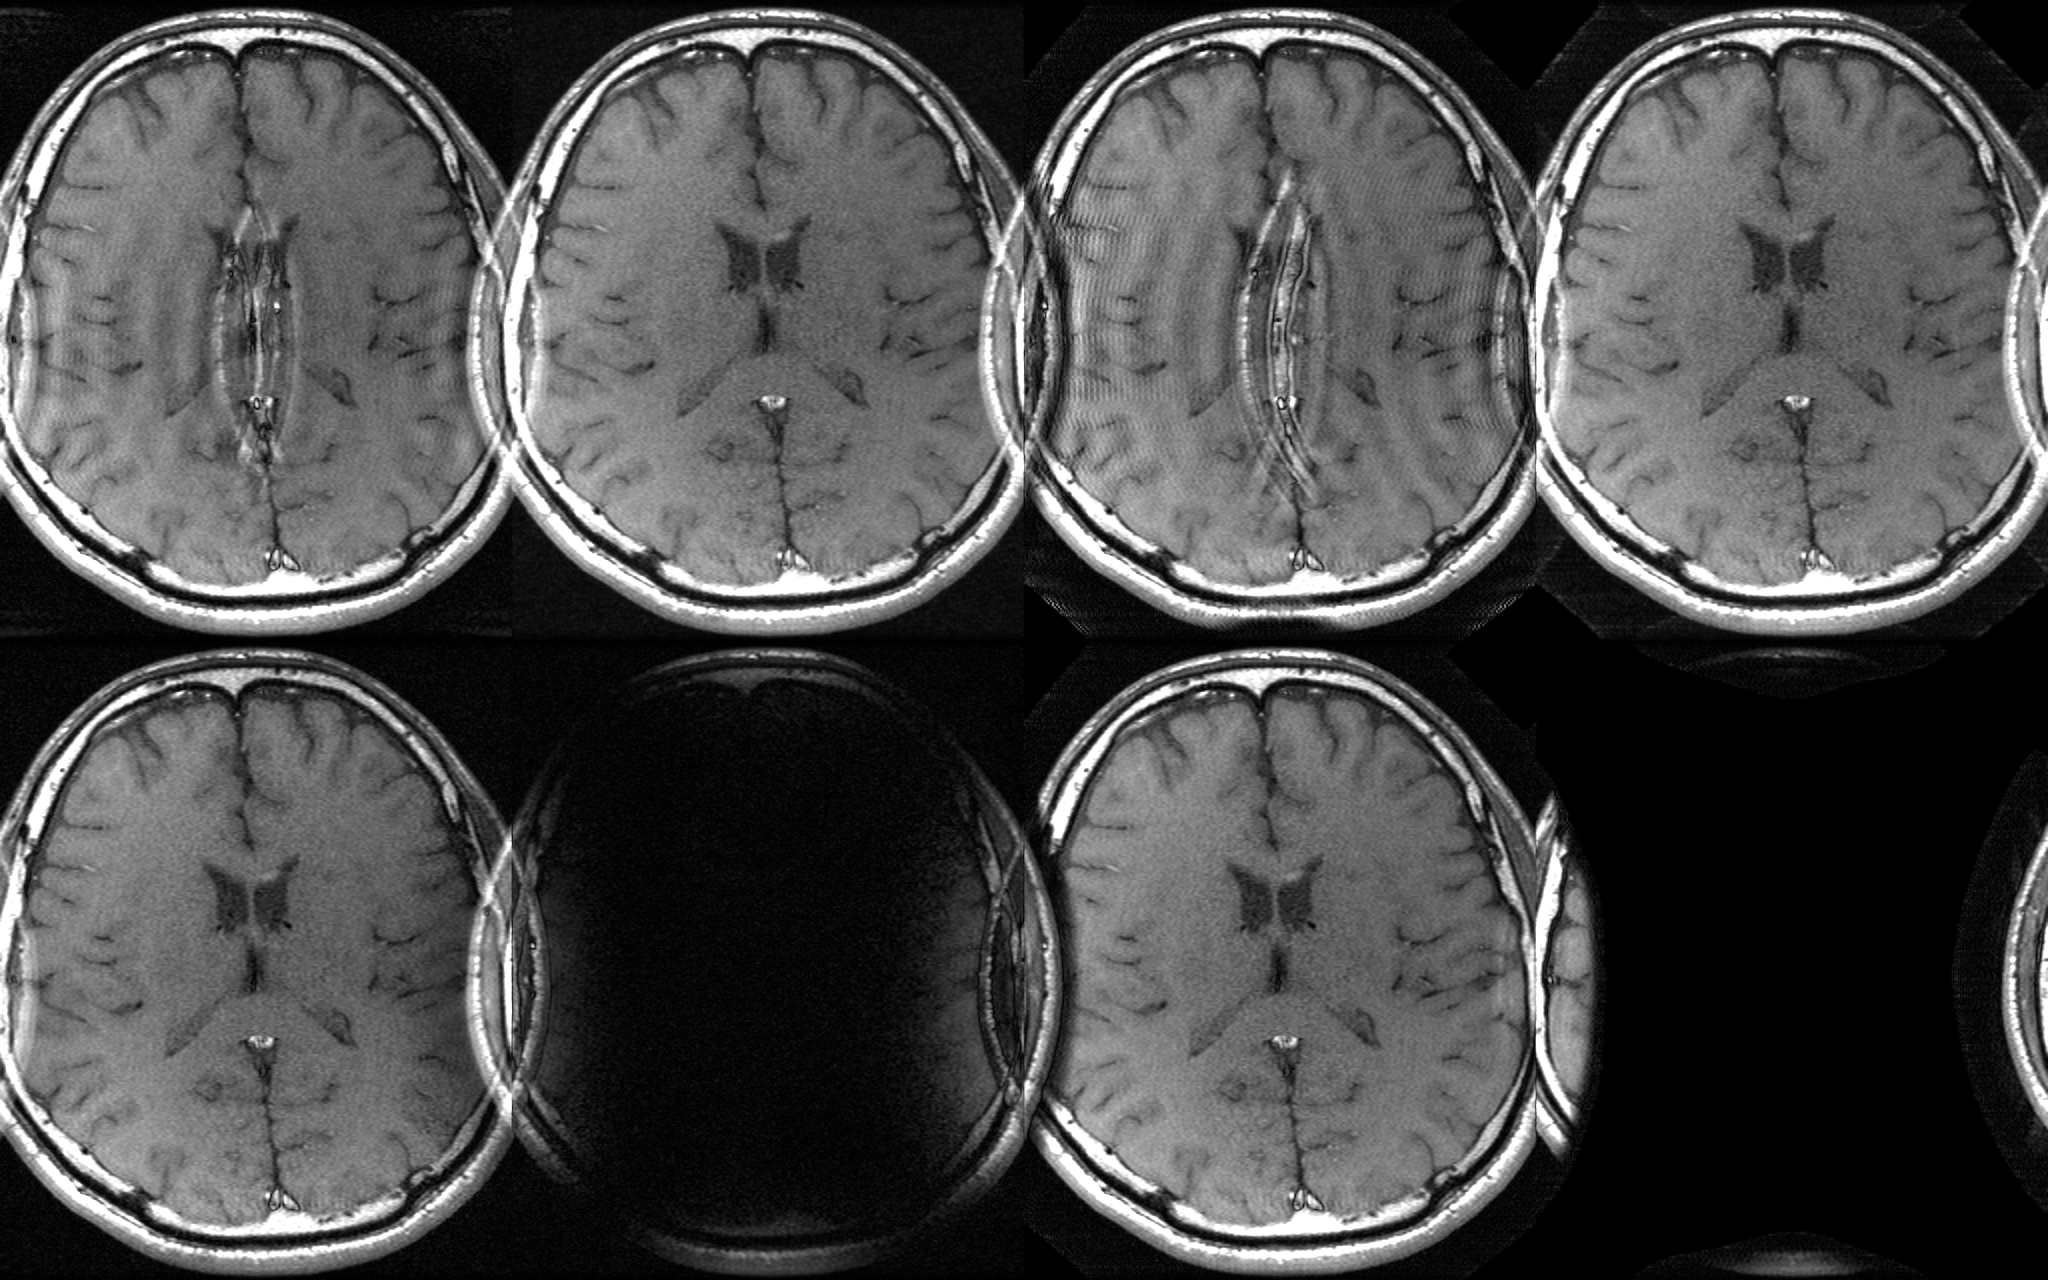

In [11]:
# Join it all together and visualize
bart join 2 reco_{ENLIVE,ESPIRiT}/r_j reco_ENLIVE_ESPIRiT
imshow reco_ENLIVE_ESPIRiT -x2 -y1 -u0.5
# Top row: ENLIVE with 1 and 2 maps, ESPIRiT with 1 and 2 maps
# Bottom row: Map 1 and 2 of ENLIVE, map 1 and 2 of ESPIRiT

Figures 2 and 3 are too computationally expensive for binder, please use the provided shell scripts